In [1]:
# This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
from mlrefined_libraries import math_optimization_library as optlib
import numpy as np
from datetime import datetime 
static_plotter = optlib.static_plotter.Visualizer();
optimizers = optlib.optimizers

#this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True
%matplotlib notebook

import matplotlib.pyplot as plt

In [2]:
# zero order coordinate search
def coordinate_search(g,alpha_choice,max_its,w):
    # construct set of all coordinate directions
    directions_plus = np.eye(np.size(w),np.size(w))
    directions_minus = - np.eye(np.size(w),np.size(w))
    directions = np.concatenate((directions_plus,directions_minus),axis=0)
        
    # run coordinate search
    weight_history = []         # container for weight history
    cost_history = []           # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):        
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
            
        # record weights and cost evaluation
        weight_history.append(w)
        cost_history.append(g(w))
        
        ### pick best descent direction
        # compute all new candidate points
        w_candidates = w + alpha*directions
        
        # evaluate all candidates
        evals = np.array([g(w_val) for w_val in w_candidates])

        # if we find a real descent direction take the step in its direction
        ind = np.argmin(evals)
        if g(w_candidates[ind]) < g(w):
            # pluck out best descent direction
            d = directions[ind,:]
        
            # take step
            w = w + alpha*d
        
    # record weights and cost evaluation
    weight_history.append(w)
    cost_history.append(g(w))
    return weight_history,cost_history

In [25]:
def compare_batch_vs_stochastic_coordinate_search(**kwargs):

    
    num_terms = 5 # default number of terms in the objective function
    if 'num_terms' in kwargs:            
        num_terms = kwargs['num_terms']
            
    num_wieghts = 2 # default number of weights 
    if 'num_wieghts' in kwargs:            
        num_wieghts = kwargs['num_wieghts']
            
    num_epochs = 10 # default number of epochs
    if 'num_epochs' in kwargs:            
        num_epochs = kwargs['num_epochs']
        
    max_its = 10 # default number of iterations per objective term
    if 'max_its' in kwargs:            
        max_its = kwargs['max_its']   
        
    alpha_choice = 1 # default step length
    if 'alpha_choice' in kwargs:            
        alpha_choice = kwargs['alpha_choice']     
    
    
    # initializing weight vector 
    w0 = np.random.randn(num_weights)
    
    # create list of random matrices, one for each term
    matrix_list = [] # container for positive semi-definite matrices
    for i in range(0, num_terms):
        matrix = np.random.randn(num_weights, num_weights)
        matrix = np.dot(matrix.T, matrix)
        matrix_list.append(matrix) 
        
        
    # create list of objective functions, one for each term 
    g = [] # container for objective functions
    
    A_tot = np.zeros((num_weights, num_weights))

    for A in matrix_list:
        # create objective function
        def f(w, A=A): return np.dot(w.T,np.dot(A,w))
        g.append(f)
        A_tot = A_tot + A

    # the overall objective function
    def g_tot(w): return np.dot(w.T,np.dot(A_tot,w))
    

    # run stochastic coordinate search  
    stochastic_weight_history = [w0] # container for weights
    stochastic_cost_history = [g_tot(w0)] # container for costs

    for i in range(0, num_epochs):
        for j in range(0, num_terms):
            # run coordinate search for each objective function
            temp_weight_history, temp_cost_history = coordinate_search(
                g[j], alpha_choice, max_its, stochastic_weight_history[-1])
        
            w = temp_weight_history[-1]
            
            # update weight and cost histories  
            stochastic_weight_history.append(w)
            stochastic_cost_history.append(g_tot(w))
            
    # run batch coordinate search
    batch_weight_history, batch_cost_history = coordinate_search(
        g_tot, alpha_choice, num_epochs, w0)  
    
    # plot results
    plt.plot(np.arange(0,num_epochs*num_terms+1), stochastic_cost_history, label='stochastic')
    plt.plot(np.arange(0,num_epochs*num_terms+1, num_terms), batch_cost_history, label='batch')
    plt.legend()
    plt.show()
    
    return

<IPython.core.display.Javascript object>


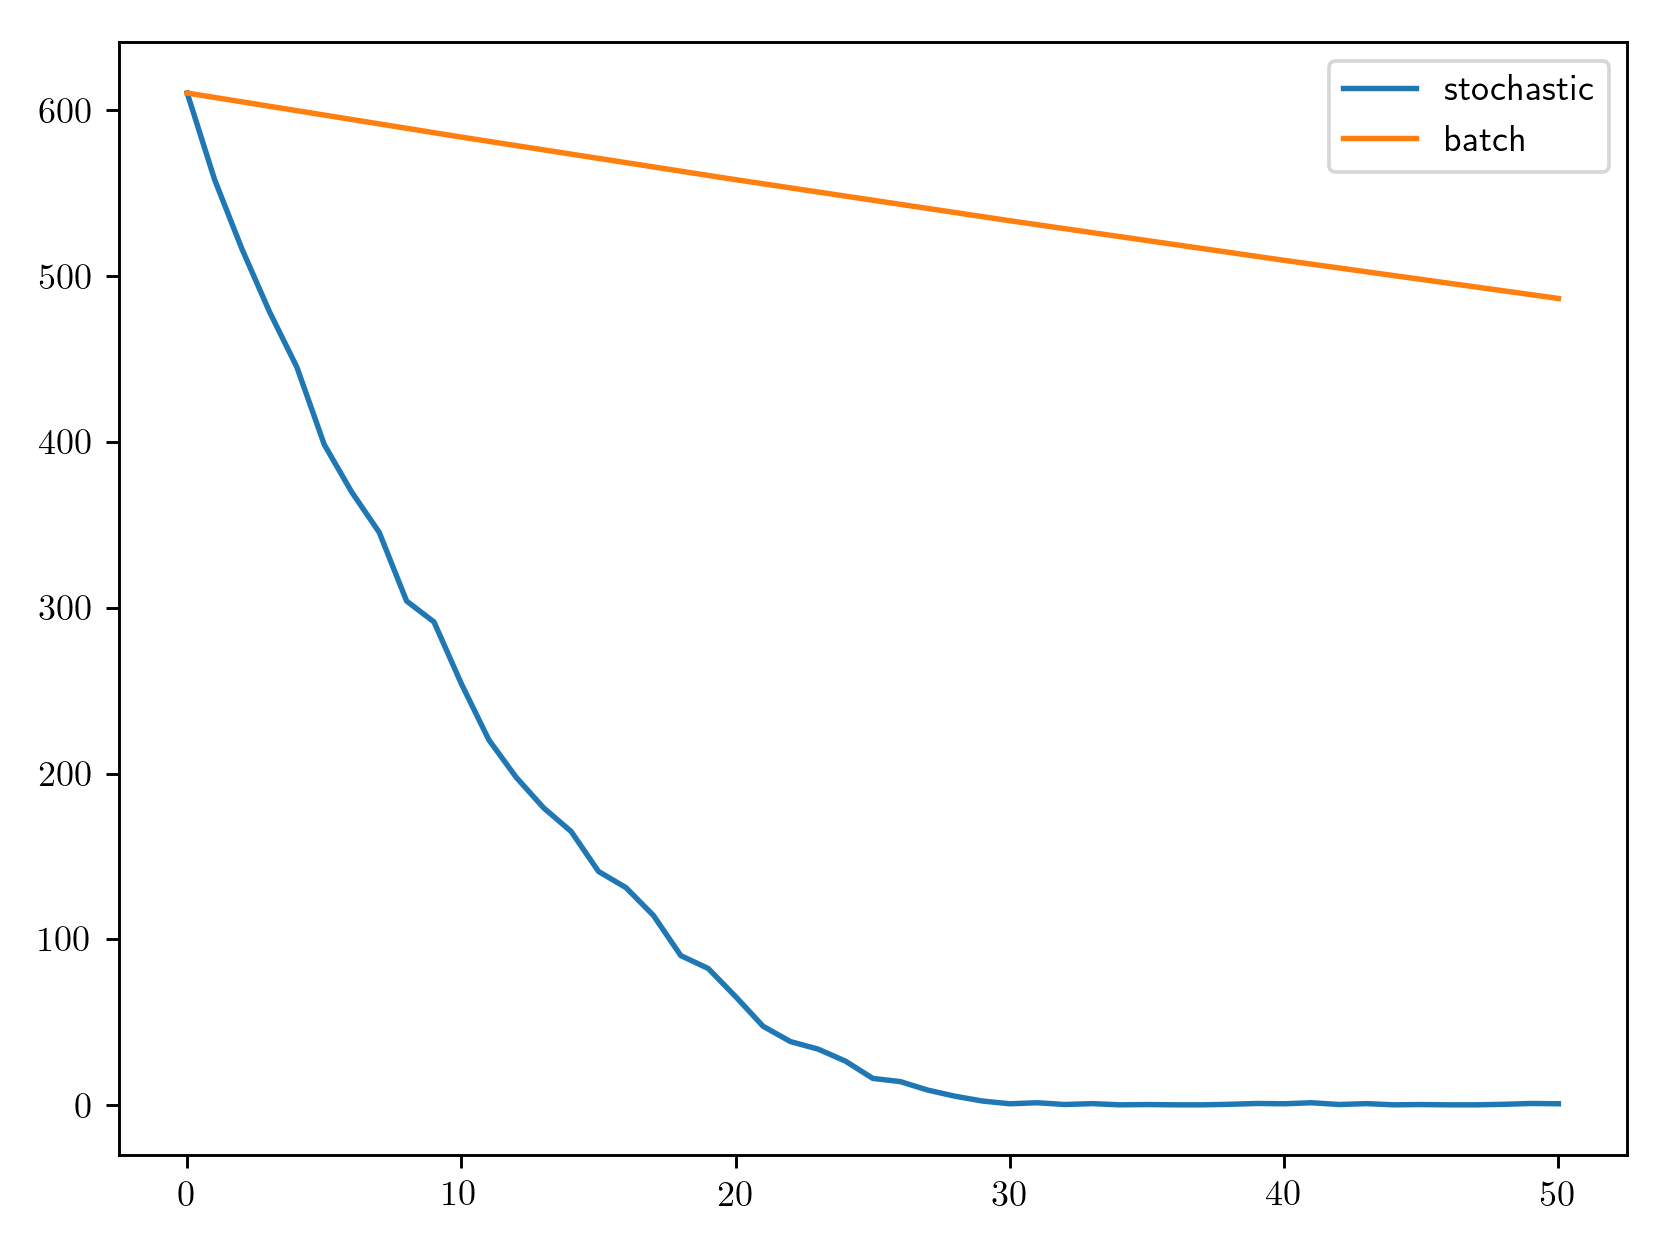

In [26]:
num_terms=10
num_weights=4
num_epochs=5
max_its=2
alpha_choice=.1

compare_batch_vs_stochastic_coordinate_search(num_terms=num_terms,
                                              num_weights=num_weights,
                                              num_epochs=num_epochs,
                                              max_its=max_its,
                                              alpha_choice=alpha_choice)